# Analyzing Data

## Prison Helicopter Escapes

We begin by importing some helper functions.

In [1]:
from helper import *

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [3]:
data = data_from_url(url)

Let's print the first three rows

In [4]:
for i in range(3):
    print(data[i])

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired t

In [5]:
index = 0

In [6]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1

In [7]:
print(data[:5])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson'], ['February 27, 1981', 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard Dupré Daniel Beaumont'], ['May 7, 1981', 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker) Giles Arseneault (prisoner)']]


Converting the date to year using the helper function 'fetch_year'

In [8]:
for row in data:
    row[0] = fetch_year(row[0])

In [9]:
print(data[:5])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson'], [1981, 'Fleury-Mérogis, Essonne, Ile de France', 'France', 'Yes', 'Gérard Dupré Daniel Beaumont'], [1981, 'Orsainville Prison, Quebec City', 'Canada', 'No', 'Marina Paquet (hijacker) Giles Arseneault (prisoner)']]


In [10]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

In [11]:
years = []
for year in range(min_year, max_year + 1):
    years.append(year)

In [12]:
attempts_per_year = []
for row in data:
    year = row[0]
    if year not in [entry[0] for entry in attempts_per_year]:
        attempts_per_year.append([year, 0])


In [13]:
print(attempts_per_year[:10])

[[1971, 0], [1973, 0], [1978, 0], [1981, 0], [1983, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0]]


## We can now answer questions with the data

In which year did the most attempts at breaking out of prison with a helicopter occur?

In [14]:
attempts_per_year = []
for row in data:
    year = row[0]
    if year not in [entry[0] for entry in attempts_per_year]:
        attempts_per_year.append([year, 0])
        
    for year_attempt in attempts_per_year:
        year_attempt_year = year_attempt[0]
        if year == year_attempt_year:
            year_attempt[1] += 1
            
print(attempts_per_year[:10])

[[1971, 1], [1973, 1], [1978, 1], [1981, 2], [1983, 1], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2]]


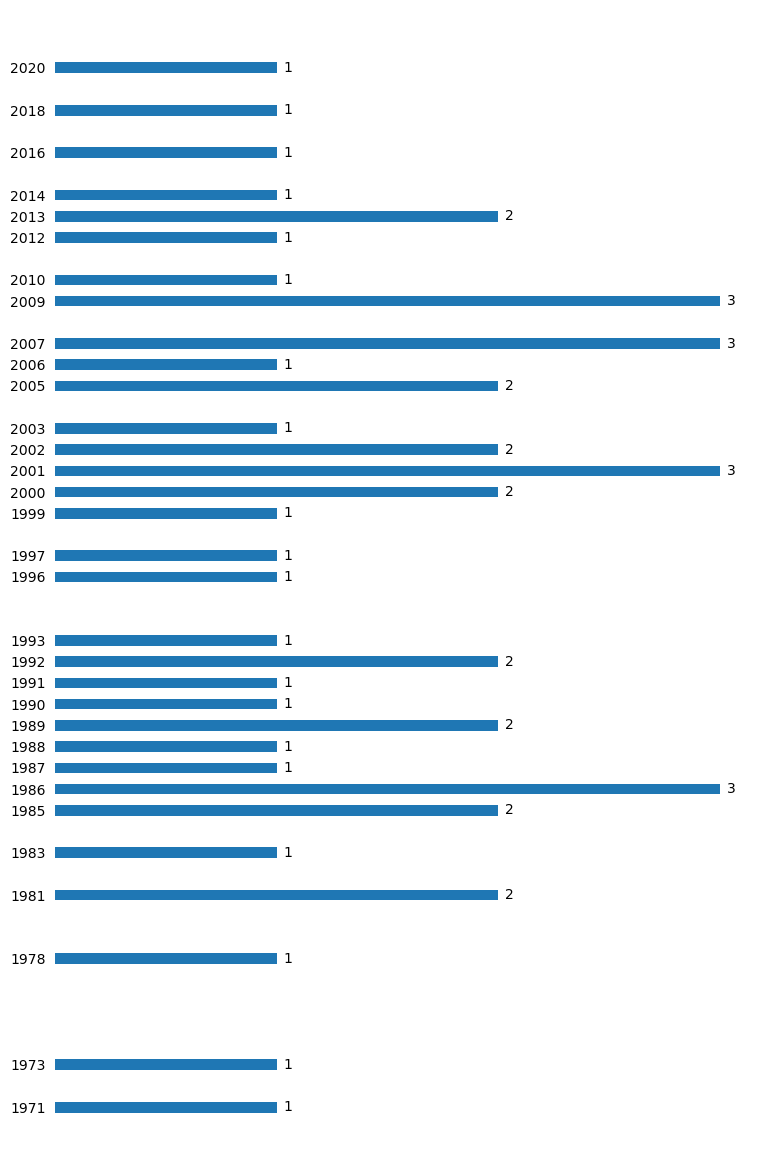

In [15]:
%matplotlib inline
barplot(attempts_per_year)

From our visual we can clearly see that the years 1986, 2001, 2006, 2009 all had 3 making them the years with the most helicopter escapes

In [16]:
countries_frequency = df["Country"].value_counts()

In [17]:
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Mexico,1
Ireland,1


In which countries do helicopter prison breaks have a higher chance of success?

In [18]:
countries = df['Country'].unique()

In [19]:
for country in countries:
    country_data = df[df['Country'] == country]
    total_attempts = country_data.shape[0]
    successes = country_data[country_data['Succeeded'] == 'Yes'].shape[0]
    success_rate = successes / total_attempts * 100
    print(f"Success rate for {country}: {success_rate:.2f}%")

Success rate for Mexico: 100.00%
Success rate for Ireland: 100.00%
Success rate for United States: 75.00%
Success rate for France: 73.33%
Success rate for Canada: 75.00%
Success rate for Australia: 50.00%
Success rate for Brazil: 100.00%
Success rate for Italy: 100.00%
Success rate for United Kingdom: 50.00%
Success rate for Puerto Rico: 100.00%
Success rate for Chile: 100.00%
Success rate for Netherlands: 0.00%
Success rate for Greece: 50.00%
Success rate for Belgium: 50.00%
Success rate for Russia: 100.00%


We can see that Mexico, Ireland, Brazil, Italy, Puerto Rico, Chile and Russia had the highest success rate with 100% while Netherlands had the lowest with 0%



